## 活性化関数（Activation Functions）

In [174]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from IPython.display import display, Markdown, Latex

活性化関数には様々種類があるので，代表的なものを列挙して紹介します．

### Logistic Sigmoid (ロジスティック・シグモイド)

まずは符号関数をそのまま滑らかにしたような関数として，ロジスティックシグモイド関数が有名です．

$$
\operatorname{sigmoid}(x; a) = \frac{1}{1+\operatorname{exp}(-ax)}
$$

ただし，MLの文脈では$a$は重要ではないので，$a=1$として固定されます．（これを標準シグモイド関数と呼びます）よって：

$$
\operatorname{sigmoid}(x) = \frac{1}{1+\operatorname{exp}(-x)}
$$

この関数は $(-\infty, \infty) \rightarrow(0, 1)$ の短調増加連続関数です．$y=0, y=1$ を漸近線として持っていて，確率値のような値域なのでMLPでは確率を出したい場合に使われることもあります．

sigmoidの導関数：

$$
\begin{aligned}
\operatorname{sigmoid}^{\prime}(x) & =\left(\frac{1}{1+e^{-x}}\right)^{\prime} \\
& =\frac{e^{-x}}{\left(1+e^{-x}\right)^2} \\
& =\frac{1}{1+e^{-x}} \frac{e^{-x}}{1+e^{-x}} \\
& =\frac{1}{1+e^{-x}}\left(1-\frac{1}{1+e^{-x}}\right) \\
& =\operatorname{sigmoid}(x)(1-\operatorname{sigmoid}(x)) \\
\end{aligned}
$$

ただし微分の最大値が0.25であることに注意してください．（勾配消失が起きやすそうです）

In [17]:
sigmoid = lambda x: 1/(1+np.exp(-x))

sigmoid_prime = lambda x: sigmoid(x)*(1-sigmoid(x))

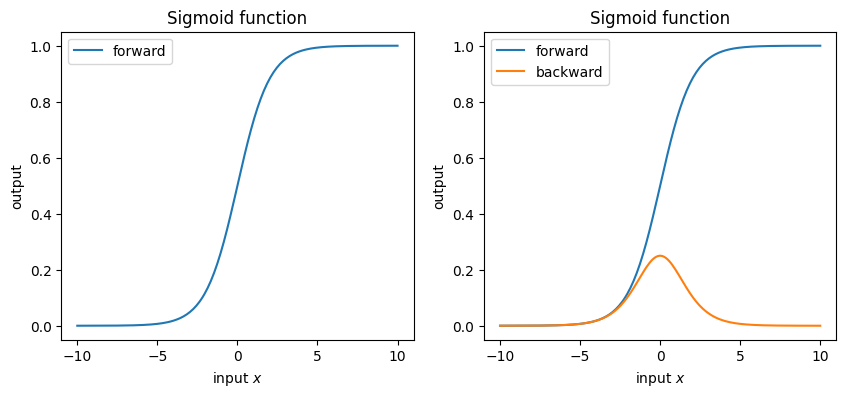

In [148]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)

x = np.linspace(-10,10,200)

plt.title("Sigmoid function")
plt.xlabel("input $x$")
plt.ylabel("output")
plt.plot(x,sigmoid(x), label="forward")
plt.legend()

plt.subplot(1,2,2)
plt.title("Sigmoid function")
plt.xlabel("input $x$")
plt.ylabel("output")
plt.plot(x,sigmoid(x), label="forward")
plt.plot(x,sigmoid_prime(x),label="backward")
#plt.title("$\operatorname{sigmoid}^{\prime}(x)$")
#plt.xlabel("input $x$")
plt.legend()
plt.show()

### $\operatorname{tanh}$（ハイパボリックタンジェント）

パーセプトロンのページでは，sign関数の出力を{1,-1}として使っていましたが，これに相当する関数として$\operatorname{tanh}$ があります．tanhはsigmoid関数に非常によく似た形になっている（取り得る範囲が0~1と-1~1の違い）ことがわかります．そのため，ニューラルネットワークの実装ではsigmoidの代わりにtanhを利用することもよくあります．

さて，tanhは双曲線関数と呼ばれているもので，これにはsinh（ハイパボリックサイン）,cosh（ハイパボリックコサイン）などの仲間がいます．活性化関数としてよく使われるのはtanhのみですが，それぞれ見ておきましょう．

$$
\begin{aligned}
\sinh x & =\frac{e^x-e^{-x}}{2} \\
\cosh x & =\frac{e^x+e^{-x}}{2} \\
\tanh x & =\frac{\sinh x}{\cosh x}=\frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{aligned}
$$

この関数は $(-\infty, \infty) \rightarrow(-1, 1)$ の短調増加連続関数です．$y=-1, y=1$ を漸近線として持っていて，sigmoidとよく似たグラフになります．

tanhの導関数：

$$
\begin{aligned}
(\tanh x)^{\prime}=& \bigg( \frac{e^x-e^{-x}}{e^x+e^{-x}} \bigg)^{\prime}\\
&=\dfrac{(e^x+e^{-x})^2-(e^x-e^{-x})^2}{(e^x+e^{-x})^2}\\ 
&=\dfrac{4}{(e^x+e^{-x})^2} \\ 
&=\frac{1}{\operatorname{cosh} x} 
\qquad \because  \cosh x=\frac{e^x+e^{-x}}{2}\\
\end{aligned}
$$

In [149]:
np.sinh
np.cosh 
np.tanh 

tanh_prime = lambda x: 1/np.cosh(x)**2

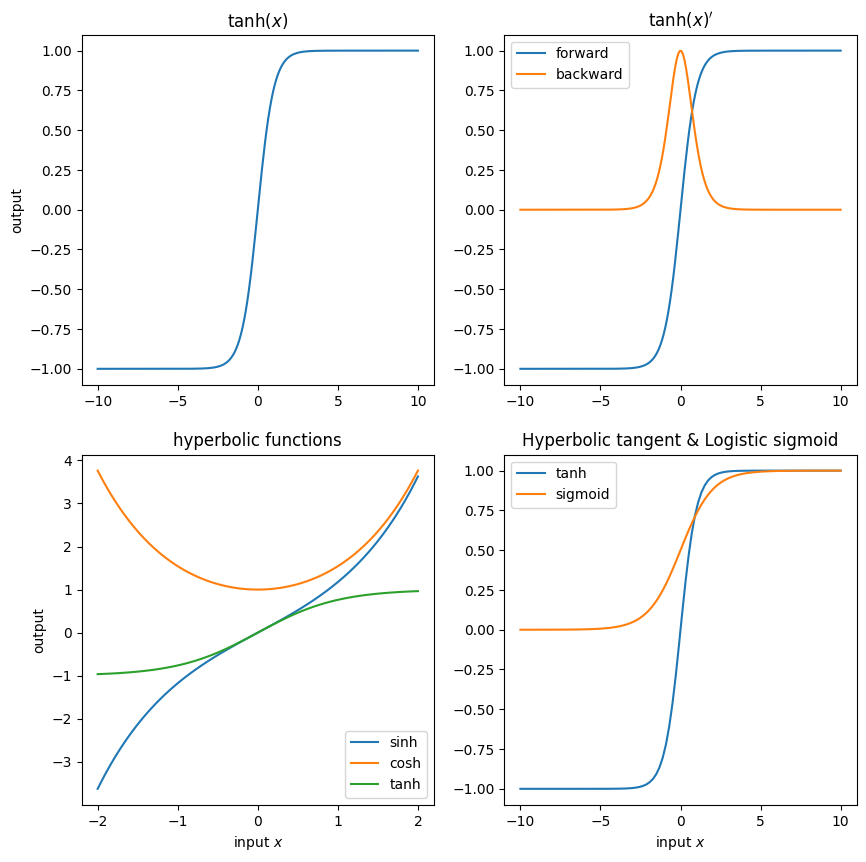

In [153]:
plt.figure(figsize=(10, 10))
x = np.linspace(-10,10,200)
plt.subplot(2,2,1)
plt.plot(x,np.tanh(x), )
plt.title("$\operatorname{tanh}(x)$")
plt.ylabel("output")

plt.subplot(2,2,2)
plt.plot(x,np.tanh(x), label="forward")
plt.plot(x,tanh_prime(x), label="backward")
plt.title("$\operatorname{tanh}(x)^{\prime}$")
plt.legend()


plt.subplot(2,2,3)
x = np.linspace(-2,2,100)
plt.plot(x,np.sinh(x), label="sinh")
plt.plot(x,np.cosh(x), label="cosh")
plt.plot(x,np.tanh(x), label="tanh")
plt.legend()
plt.xlabel("input $x$")
plt.title("hyperbolic functions")
plt.ylabel("output")

plt.subplot(2,2,4)
x = np.linspace(-10,10,100)
plt.plot(x,np.tanh(x), label="tanh")
plt.plot(x, (lambda x: 1/(1+np.exp(-x)))(x), label="sigmoid")
plt.title("Hyperbolic tangent & Logistic sigmoid")
plt.xlabel("input $x$")
plt.legend()
plt.show()

### ReLU（Rectified Linear Unit）/ランプ関数

活性化関数として使う関数は，とりあえず非線形であればいい筈です．上の二つのように有界ではない活性化関数の一例としてReLU関数を紹介します．

ReLUはDeep Learningと呼ばれる手法が出てきてから用いられることが多くなった活性化関数で，中身は非常にシンプルです．

$$
\begin{aligned}
\operatorname{ReLU}(x)&=\operatorname{max}(x,0) \\
    &=\begin{cases}
        0, & x \leq 0 \\ 
        x, & x>0 \\
    \end{cases} \\
\end{aligned}
$$

また，これの導関数：

$$
\operatorname{ReLU}^{\prime}(x)= \begin{cases}0, & x<0 \\ \text { NaN, } & x=0 \\ 1, & x>0\end{cases}
$$

この通り微分できない部分があるのですが，$x=0$はとりあえず正の数$x<0$に含めて微分値0としてしまいます．

In [11]:
# np.maxだと最大値を取ってしまうので注意
relu = lambda x: np.maximum(x,0).astype(x.dtype)

@np.vectorize
def relu_prime(x):
    if x <= 0:
        return 0
    return 1

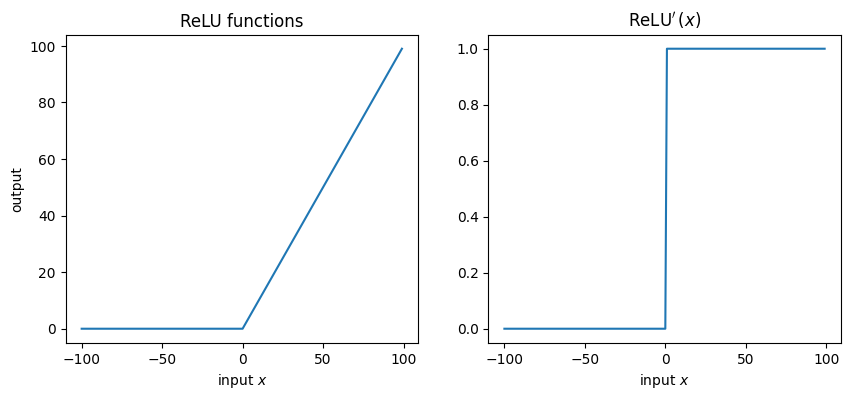

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
x = np.arange(-100,100)

plt.plot(x,relu(x))
plt.title("ReLU functions")
plt.xlabel("input $x$")
plt.ylabel("output")

plt.subplot(1,2,2)

plt.plot(x,relu_prime(x))
plt.title("$\operatorname{ReLU}^{\prime}(x)$")
plt.xlabel("input $x$")
plt.show()

### SoftPlus

ReLUは非線形ですが滑らかではない関数でした．そこでReLUを滑らかにしたような関数として，SoftPlusを紹介します．

$$
\operatorname{softplus}(x) = \log{(1+\operatorname{exp}(x))}
$$


これの導関数：

$$
\begin{aligned}

{\operatorname{softplus}(x)}^{\prime} 
&= {\log{(1+\operatorname{exp}(x))}}^{\prime} \\
&= \frac{1}{1+\operatorname{exp}(-x)} \\
&= \operatorname{sigmoid}(x) \\

\end{aligned}
$$


In [13]:
softplus = lambda x: np.log(1. + np.exp(x))

softplus_prime = sigmoid

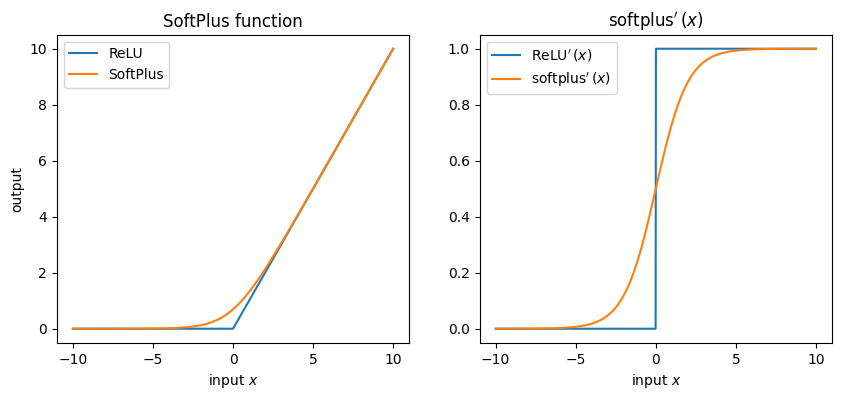

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.linspace(-10,10, 1000)
plt.plot(x,relu(x), label="ReLU")
plt.plot(x,softplus(x), label="SoftPlus")
plt.title("SoftPlus function")
plt.xlabel("input $x$")
plt.ylabel("output")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,relu_prime(x), label="$\operatorname{ReLU}^{\prime}(x)$")
plt.plot(x, softplus_prime(x), label="$\operatorname{softplus}^{\prime}(x)$")
plt.title("$\operatorname{softplus}^{\prime}(x)$")
plt.xlabel("input $x$")

plt.legend()
plt.show()

### Softmax

Softmaxはクラス分類やカテゴリカルデータの再構成がしたい時に利用する関数です．各成分は正の数であり，その合計は1になります．名前の通りsoftなargmax関数のような特性を持っていて（argmaxを滑らかな関数で近似している），微分可能関数です．

$$
\begin{aligned}

\operatorname{softmax}(\mathbf{x})_i 
&= \frac{\operatorname{exp}({x}_i)}{\sum_{k=1}^{c}\operatorname{exp}({x}_k)} \\
&= \frac{\operatorname{exp}({x}_i)}{\operatorname{exp}({x}_1)+\operatorname{exp}({x}_2)+ \cdots \operatorname{exp}({x}_c)} \\
&(i=1,\cdots,c)

\end{aligned}

$$

これまでの活性化関数がスカラーを受け取ってスカラーを返す関数だった（またはベクトルを受け取って全ての要素を独立に変換して返す関数だった）のに対し，Softmaxではベクトルを受け取ってベクトルを返すことを前提としています．

> softmax関数は，「シグモイド関数を個用意し，それらの出力全体を正規化することで，和が必ず1になって，確率出力ができるようにした関数」と捉えることができる．
>
> [softmax 関数 (ソフトマックス関数) [活性化関数] |CVMLエキスパートガイド](https://cvml-expertguide.net/terms/dl/layers/activation-function/softmax/)


これの導関数：

$$
\frac{\partial \operatorname{softmax}(\mathbf{x})_i }{\partial x_j} 
=\begin{cases}
\operatorname{softmax}(\mathbf{x})_i(1-\operatorname{softmax}(\mathbf{x})_i ) & i=j \\
-\operatorname{softmax}(\mathbf{x})_i \operatorname{softmax}(\mathbf{x})_j & i \ne j \\
\end{cases}
$$

In [37]:
# ナイーブな実装
softmax = lambda x: np.exp(x) / np.exp(x).sum()

# 数値的に安定した実装
def softmax(x):
    shifted_x = x - x.max()
    exp_x = np.exp(shifted_x) # exp(x)でoverflowするのを防ぐ
    return exp_x / exp_x.sum()

# 多次元配列に対応するための実装
def softmax(x, axis=-1):
    shifted_x = x - x.max(axis, keepdims=True)
    exp_x = np.exp(shifted_x)
    return exp_x / exp_x.sum(axis, keepdims=True)

def softmax_prime(x, axis=-1):
    y = softmax(x,axis)
    return -np.outer(y,y) + np.diag(y.flatten())

### 例1

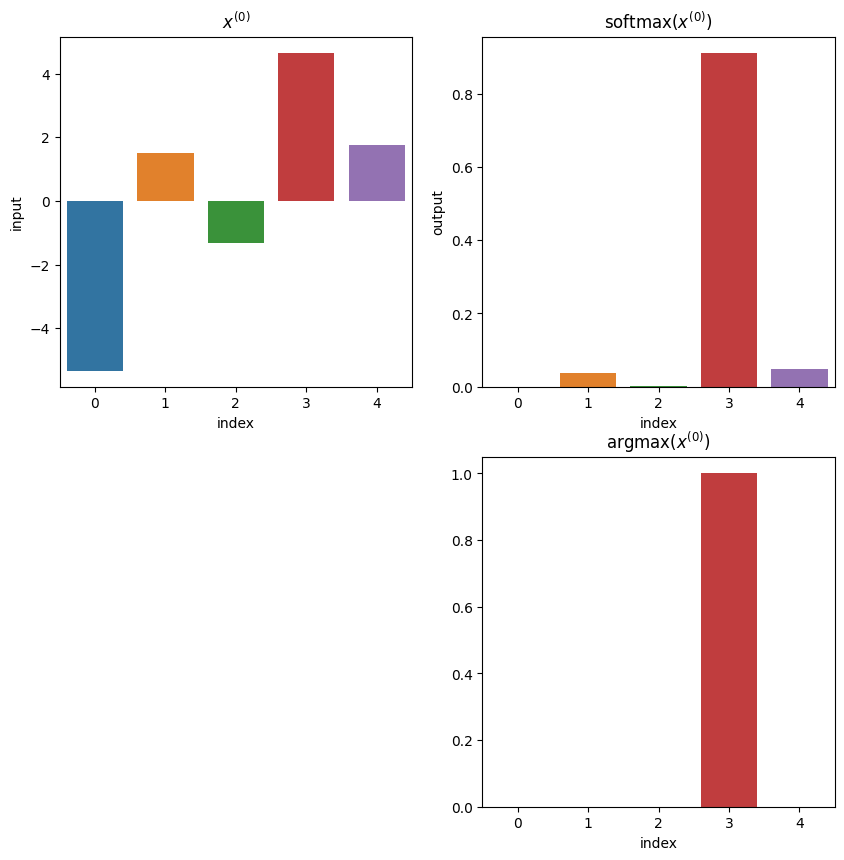

softmaxの各要素の合計：1.0


### 例2

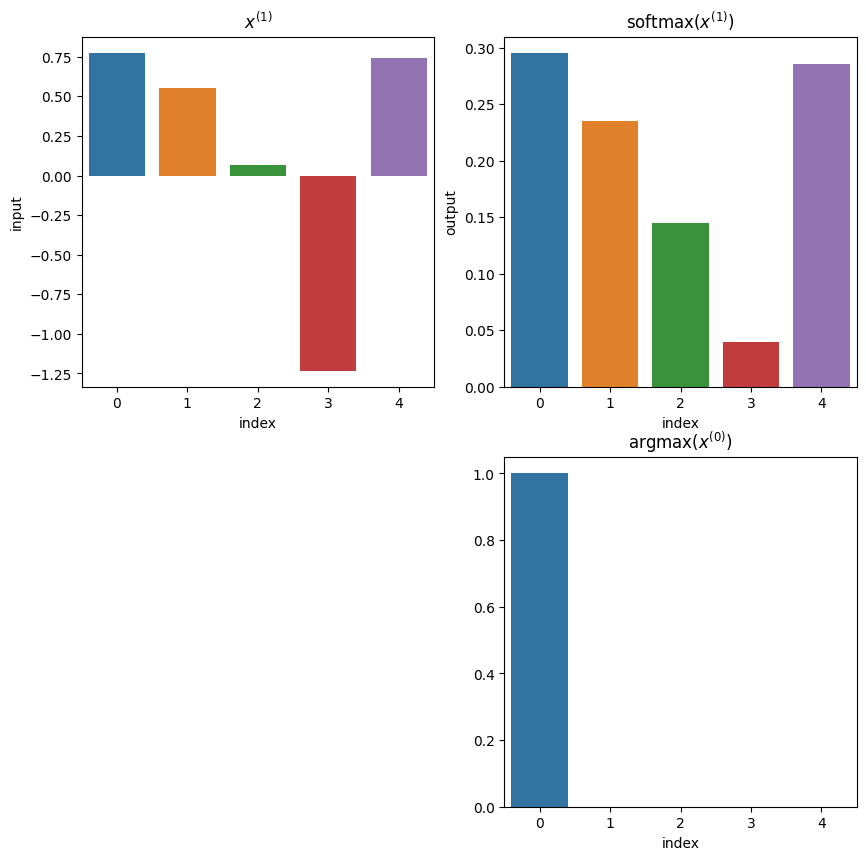

softmaxの各要素の合計：1.0


In [183]:
def argmax(x):
    tmp = np.zeros_like(x)
    index = np.argmax(df.input)
    tmp[index] = 1
    return tmp

x = np.random.normal(0, 2, [5])
index = np.arange(len(x))
df = pd.DataFrame({"index": index,
                   "input": x,
                   "output": softmax(x)}
                   )
#df.plot.bar("index", ["input", "output"])

display(Markdown("### 例1"))
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("$x^{(0)}$")
sns.barplot(df, x="index",y="input")

plt.subplot(2,2,2)
plt.title("softmax($x^{(0)}$)")
sns.barplot(df, x="index",y="output")

plt.subplot(2,2,4)
plt.title("argmax($x^{(0)}$)")

sns.barplot(df, x="index",y=argmax(df.index))

plt.show()
print(f"softmaxの各要素の合計：{np.sum(df.output)}")

display(Markdown("### 例2"))
x = np.random.normal(0, 1, [5])
index = np.arange(len(x))
df = pd.DataFrame({"index": index,
                   "input": x,
                   "output": softmax(x)}
                   )
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("$x^{(1)}$")
sns.barplot(df, x="index",y="input")
plt.subplot(2,2,2)
plt.title("softmax($x^{(1)}$)")
sns.barplot(df, x="index",y="output")

plt.subplot(2,2,4)
plt.title("argmax($x^{(0)}$)")

sns.barplot(df, x="index",y=argmax(df.index))

plt.show()
print(f"softmaxの各要素の合計：{np.sum(df.output)}")

https://github.com/eliben/deep-learning-samples/blob/master/softmax/softmax.py